<a href="https://colab.research.google.com/github/piotrekwisniewski/MachineLearning/blob/main/1_PWI_ML_Titanic_Kaggle_trees_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Kaggle Competition

---   
<br>
   
The Titanic Kaggle competition is a data science competition hosted by Kaggle, a platform for data science and machine learning competitions.

The dataset provided for the competition includes information on 891 of the 2224 passengers and crew members aboard the Titanic, including their age, gender, class of travel, fare paid, and other demographic information.

> The goal is to build a model that can predict whether a passenger survived or not based on this information.

URL: https://www.kaggle.com/c/titanic


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# display settings

pd.options.display.max_columns = None
pd.options.display.max_rows = 40

## Data get


In [ ]:
# Data load from file shared on Google drive

data_raw = pd.read_csv('https://drive.google.com/uc?id=1tgsUSPhyetb5YRtXmd-Pp4XyouKxaS0B')
# data_raw.info()


In [ ]:
#data_raw
data_raw.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Dataset contains information about passenger who were onboard the Titanic when it sank on it's maiden voyage in **1912**.


There are two files `train.csv `and `test.csv`.

The `train.csv` file contains information about **891** passengers, while the `test.csv` file contains information about **418** passengers.

The features in the dataset include:
* **PassengerId**: Unique ID given to each passenger
* **Survived**: Whether the passenger survived (1) or not (0)
* **Pclass**: Passenger class (1st, 2nd, or 3rd class)
* **Name**: Name of the passenger
* **Sex**: Gender of the passenger  **(further will be encoded 0 for male and 1 for female)**
* **Age**: Age of the passenger (in years)
* **SibSp**: Number of siblings/spouses aboard the Titanic
* **Parch**: Number of parents/children aboard the Titanic
* **Ticket**: Ticket number
* **Fare**: Passenger fare
* **Cabin**: Cabin number
* **Embarked**: Port of embarkation:
  * C = Cherbourg, France
  * Q = Queenstown, Ireland
  * S = Southampton, UK
    

The **Survived** column is the target variable.
The remaining features are input variables to train a model.





### Warm-up
Searching Rose and Jack on the passengers list.

In [ ]:
# check if Titanic movies main characters could heve been on cruise
rose_in_names = data_raw.Name.str.contains('rose', case=False ).any()
jack_in_names = data_raw['Name'].str.contains('jack', case=False ).any()

print(f"Is 'rose' in passenger list: {rose_in_names}")
print([x for x in data_raw.Name if 'rose' in x.lower()])

print(f"Is 'jack' in passenger list: {jack_in_names}")
[x for x in data_raw.Name if 'jack' in x.lower()]

Is 'rose' in passenger list: True
['Hood, Mr. Ambrose Jr', 'Aks, Mrs. Sam (Leah Rosen)']
Is 'jack' in passenger list: True


['Brewe, Dr. Arthur Jackson']

In [ ]:
# looking for the richest man who was on the ship (John Jacob Astor IV)

[x for x in data_raw.Name if 'astor' in x.lower()]

['Astor, Mrs. John Jacob (Madeleine Talmadge Force)']

In [ ]:
# Functions speed comparison

In [ ]:
# %timeit data_raw['Name'].str.contains('rose', case=False ).any()

In [ ]:
# %timeit any('rose' in x.lower() for x in data_raw.Name)

In [ ]:
# data_raw.query('Fare > 500')

## EDA (Exploratory Data Analysis)
with SweetViz library (https://pypi.org/project/sweetviz/)  
example notebook: https://colab.research.google.com/drive/1-md6YEwcVGWVnQWTBirQSYQYgdNoeSWg?usp=sharing


In [ ]:
# Downloading and setup sweetviz
!pip install sweetviz -qq
# !echo '[Layout]' > Override.ini
# !echo 'show_logo = 0' >> Override.ini

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 92.9 MB/s eta 0:00:00


In [ ]:
# # Creating basic data report
# import sweetviz as sv
# # sv.config_parser.read("Override.ini")
# my_report = sv.analyze(data_raw)
# my_report.show_html(filepath='Basic_report.html', layout='vertical', scale=None)
# my_report.show_notebook()


In [ ]:
# # Analyze report
# import sweetviz as sv
# # sv.config_parser.read("Override.ini")
# feature_config = sv.FeatureConfig(skip=["PassengerId", "Name"], force_text=["Age"])
# analyze_report = sv.analyze([data_raw, 'TrainSet'], 'Survived', feature_config)
# analyze_report.show_html(filepath='Analyze_report.html', layout='vertical', scale=None)
# analyze_report.show_notebook()


In [ ]:
# # Comparing report (subsets by sex)
# import sweetviz as sv
# # sv.config_parser.read("Override.ini")
# intra_report = sv.compare_intra(data_raw, data_raw["Sex"] == 'male', ["Male", "Female"], "Survived")
# intra_report.show_html(filepath='Compare_report_male_female.html', layout='vertical', scale=None)
# intra_report.show_notebook()

## Missing data treatment

In [ ]:
df1 = data_raw.copy()

In [ ]:
df1 = df1.drop(columns = ['Name', 'Ticket', 'Cabin'])
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
df1['Embarked'] = df1['Embarked'].fillna('S')

df1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## Decision Trees and Random Forest models

In [ ]:
# Loading libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# function for printing out quality measurements

def quality_measurement(DataFrame):
    """
    :param qm: Pandas DataFrame object with two columns 'Actual' and 'Predicted' fille with 0 for decease and 1 for survive
    """
    qm = DataFrame

    # assignement of measurement value parameters:
    qm.loc[(qm['Actual'] == 1) & (qm['Predicted'] == 1), 'Status'] = 'TruePositive'
    qm.loc[(qm['Actual'] == 0) & (qm['Predicted'] == 0), 'Status'] = 'TrueNegative'
    qm.loc[(qm['Actual'] == 0) & (qm['Predicted'] == 1), 'Status'] = 'FalsePositive'
    qm.loc[(qm['Actual'] == 1) & (qm['Predicted'] == 0), 'Status'] = 'FalseNegative'

    # overall values dataframe
    qm_results = qm['Status'].value_counts()

    # variables assignement
    TP = qm_results.loc['TruePositive']
    TN = qm_results.loc['TrueNegative']
    FP = qm_results.loc['FalsePositive']
    FN = qm_results.loc['FalseNegative']

    # measurements calculation:
    accuracy = float((TP + TN) / (TP + TN + FP + FN))
    precision = float((TP) / (TP + FP))
    recall = float((TP) / (TP + FN))
    f1_score = float((2 * (precision * recall)) / (precision + recall))

    # outcomes printing out
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1_score:.2f}')

    return accuracy, precision, recall, f1_score, TP, TN, FP, FN


### Simple decision tree model training

In [ ]:
# Simple tree
# Creating an instance of our decision tree
tree = DecisionTreeClassifier(max_depth=5,
                              random_state =0,
                              min_samples_leaf=20,
                              criterion = 'gini')

# Training / Fitting model to the data
tree.fit(df1.loc[:,['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], df1.Survived)

# Prediction
predictions_1 = tree.predict(df1.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

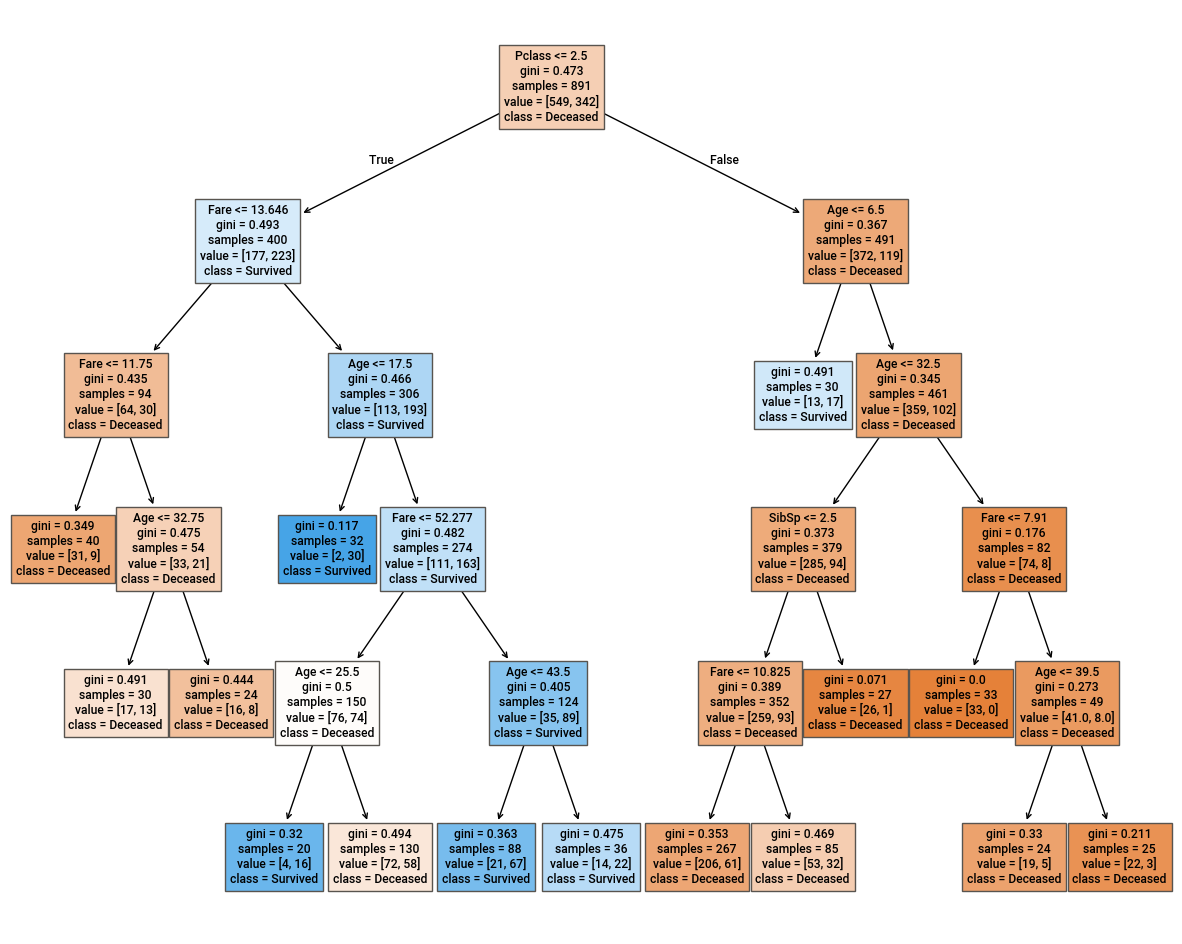

In [ ]:
# Creating a plot of our model
plt.subplots(figsize = (15,12))
plot_tree(tree,impurity =True,
          feature_names = tree.feature_names_in_,
          class_names = ['Deceased', 'Survived'],
          filled = True)
plt.show()

In [ ]:
# confusion matrix
# reading https://en.wikipedia.org/wiki/Confusion_matrix
# print(confusion_matrix(df1.Survived, predictions_1))
cm_data = pd.concat([
    pd.Series(df1.Survived, name = 'Actual'),
    pd.Series(predictions_1, name = 'Predicted')], axis = 1)
cm_data

,Actual,Predicted
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,0


In [ ]:
pd.crosstab(cm_data['Actual'], cm_data['Predicted'])

Predicted,0,1
Actual,,
0,495,54
1,190,152


In [ ]:
print(classification_report(df1.Survived, predictions_1))
measure_values_1 = quality_measurement(cm_data)


              precision    recall  f1-score   support

           0       0.72      0.90      0.80       549
           1       0.74      0.44      0.55       342

    accuracy                           0.73       891
   macro avg       0.73      0.67      0.68       891
weighted avg       0.73      0.73      0.71       891

Accuracy: 0.73
Precision: 0.74
Recall: 0.44
F1-score: 0.55


### Decision tree with categorical features encoded

Encode sex and embarkation port with OneHotEncoder.

In [ ]:
# Sex encoding
from sklearn.preprocessing import OneHotEncoder

# creating a copy of DataFrame
df2 = df1.copy()

encoder = OneHotEncoder(sparse_output=False)
encoded_data1 = encoder.fit_transform(df2.loc[:,['Sex']],)
encoded_sex = pd.DataFrame(encoded_data1, columns=encoder.get_feature_names_out())

# Sex: 0 for male 1 for female
df2['Sex_encoded'] = encoded_sex['Sex_female']

In [ ]:
# Embarkation port encoding
# There will be 3 new columns with value: 1 if person embarked in appropriate city
encoder = OneHotEncoder(sparse_output=False)
encoded_data2 = encoder.fit_transform(df2.loc[:,['Embarked']],)
encoded_embarkation = pd.DataFrame(encoded_data2, columns = encoder.get_feature_names_out())

df2 = pd.merge(df2, encoded_embarkation, how='left', left_index=True, right_index=True )

# unnecessary column drop
df2 = df2.drop('Embarked', axis=1)
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,0.0,0.0,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,1.0,1.0,0.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,1.0,0.0,0.0,1.0
3,4,1,1,female,35.0,1,0,53.1000,1.0,0.0,0.0,1.0
4,5,0,3,male,35.0,0,0,8.0500,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0.0,0.0,0.0,1.0
887,888,1,1,female,19.0,0,0,30.0000,1.0,0.0,0.0,1.0
888,889,0,3,female,28.0,1,2,23.4500,1.0,0.0,0.0,1.0
889,890,1,1,male,26.0,0,0,30.0000,0.0,1.0,0.0,0.0


In [ ]:
# 2nd decision tree creating
tree2 = DecisionTreeClassifier(max_depth=6,
                              random_state=42,
                              min_samples_leaf=25,
                              criterion = 'gini')

# data to fit (chosen features)
X = df2[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
# target variable
y = df2['Survived']

# Training / Fitting model to the data
tree2.fit(X,y)

# Prediction
predictions_2 = tree2.predict(X)

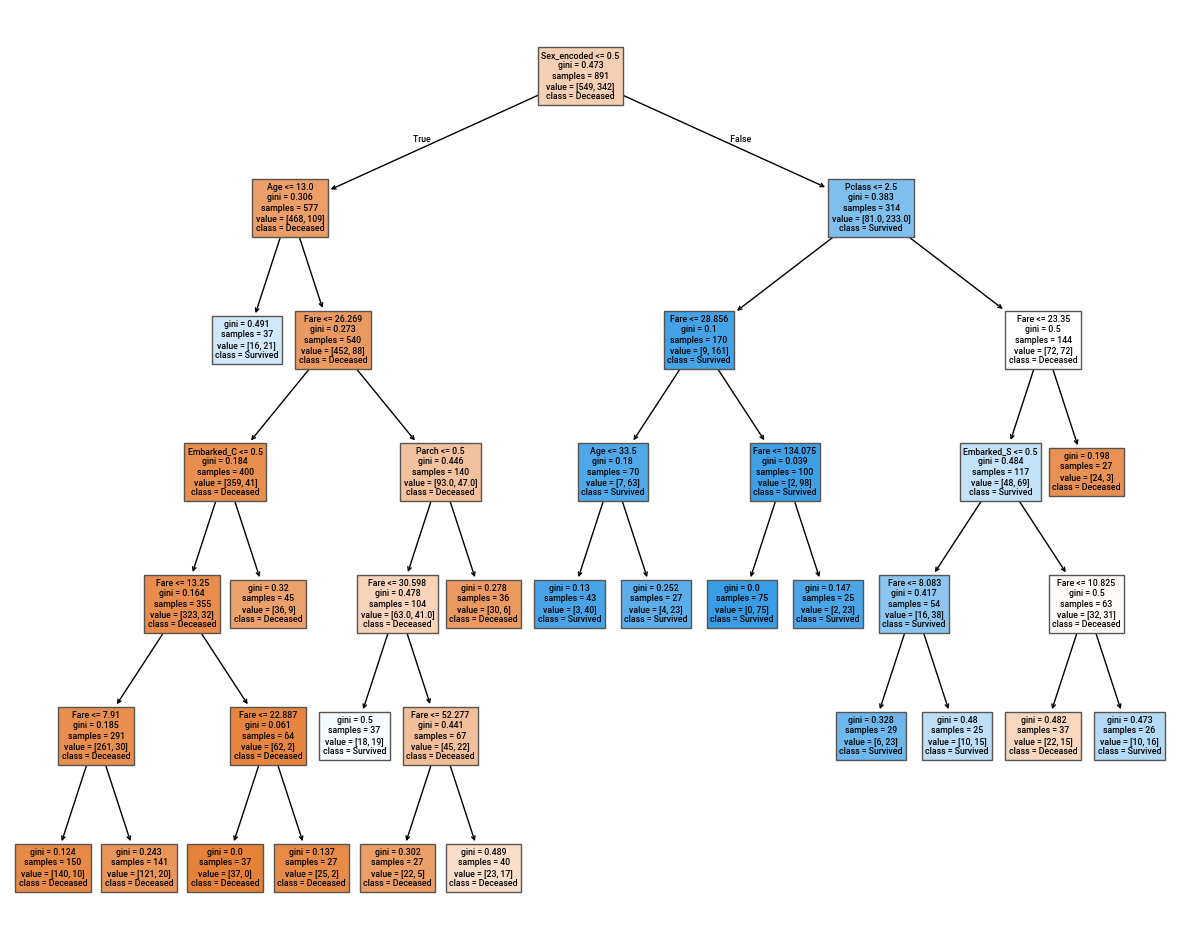

In [ ]:
# 2nd plot
plt.subplots(figsize = (15,12))
plot_tree(tree2,impurity =True,
          feature_names = tree2.feature_names_in_,
          class_names = ['Deceased', 'Survived'],
          filled = True)
plt.show()

In [ ]:
# confusion matrix
# print(confusion_matrix(df2.Survived, predictions_2))
cm_data_2 = pd.concat([
    pd.Series(df2.Survived, name = 'Actual'),
    pd.Series(predictions_2, name = 'Predicted')], axis = 1)
cm_data_2

,Actual,Predicted
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [ ]:
pd.crosstab(cm_data_2['Actual'], cm_data_2['Predicted'])

Predicted,0,1
Actual,,
0,480,69
1,87,255


In [ ]:
print(classification_report(df2.Survived, predictions_2))
measure_values_2 = quality_measurement(cm_data_2)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.79      0.75      0.77       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891

Accuracy: 0.82
Precision: 0.79
Recall: 0.75
F1-score: 0.77


### Random forest
Check out the performance of random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# implementing random forest
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, min_samples_leaf=25, random_state=42)

# data to fit (chosen features)
X = df2[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
# target variable
y = df2['Survived']

# Training / Fitting model to the data
random_forest.fit(X, y)

# Prediction
predictions_3 = random_forest.predict(X)

In [ ]:
# confusion matrix
print(confusion_matrix(df2.Survived, predictions_3))

cm_data_3 = pd.concat([
    pd.Series(df2.Survived, name = 'Actual'),
    pd.Series(predictions_3, name = 'Predicted')], axis = 1)

pd.crosstab(cm_data_3['Actual'], cm_data_3['Predicted'])

[[515  34]
 [128 214]]


Predicted,0,1
Actual,,
0,515,34
1,128,214


In [ ]:
print(classification_report(df2.Survived, predictions_3))
measure_values_3 = quality_measurement(cm_data_3)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       549
           1       0.86      0.63      0.73       342

    accuracy                           0.82       891
   macro avg       0.83      0.78      0.79       891
weighted avg       0.82      0.82      0.81       891

Accuracy: 0.82
Precision: 0.86
Recall: 0.63
F1-score: 0.73


### Cross-Validation

Comparing above models with CV.

In [ ]:
from sklearn.model_selection import cross_val_score

models = [tree, tree2, random_forest]

for j in ['accuracy', 'precision', 'recall', 'f1']:
    print(f"{j}:")
    for i, model in enumerate(models):
        if model is tree:
            X = df1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
            y = df1['Survived']
        else:
            X = df2[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
            y = df2['Survived']

        scores = cross_val_score(model, X, y, cv=20, scoring=j)
        print(f"{i+1}. {j} mean = {scores.mean():.2f}, standard deviation = {scores.std():.2f}")

accuracy:
1. accuracy mean = 0.71, standard deviation = 0.08
2. accuracy mean = 0.78, standard deviation = 0.06
3. accuracy mean = 0.80, standard deviation = 0.04
precision:
1. precision mean = 0.67, standard deviation = 0.15
2. precision mean = 0.75, standard deviation = 0.10
3. precision mean = 0.84, standard deviation = 0.09
recall:
1. recall mean = 0.51, standard deviation = 0.14
2. recall mean = 0.66, standard deviation = 0.11
3. recall mean = 0.61, standard deviation = 0.10
f1:
1. f1 mean = 0.57, standard deviation = 0.12
2. f1 mean = 0.69, standard deviation = 0.08
3. f1 mean = 0.70, standard deviation = 0.07


## Dataset split for train & test

Dataset splitted into 2 subsets for validate models.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data_raw = pd.read_csv('https://drive.google.com/uc?id=1tgsUSPhyetb5YRtXmd-Pp4XyouKxaS0B')

# creating a copy of DataFrame
df = data_raw.copy()

# missing data treatment
df = df.drop(columns = ['Name', 'Ticket', 'Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

# encoding features
encoder = OneHotEncoder(sparse_output=False)
encoded_data1 = encoder.fit_transform(df.loc[:,['Sex']])
encoded_sex = pd.DataFrame(encoded_data1, columns=encoder.get_feature_names_out())

# Sex: 0 for male 1 for female
df['Sex_encoded'] = encoded_sex['Sex_female']

# Embarkation port encoding
# There will be 3 new columns with value: 1 if person embarked in appropriate city
encoded_data2 = encoder.fit_transform(df.loc[:,['Embarked']],)
encoded_embarkation = pd.DataFrame(encoded_data2, columns = encoder.get_feature_names_out())

df = pd.merge(df, encoded_embarkation, how='left', left_index=True, right_index=True )

# unnecessary column drop
df = df.drop('Embarked', axis=1)

# data splitting

X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

                                             |          | [  0%]   00:00 -> (? left)


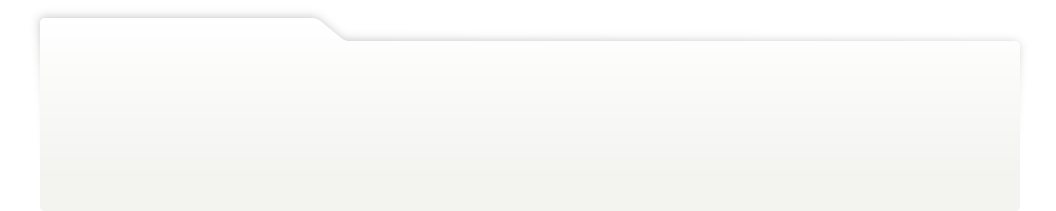
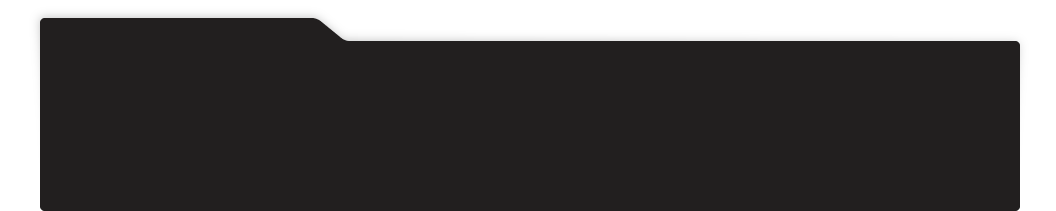
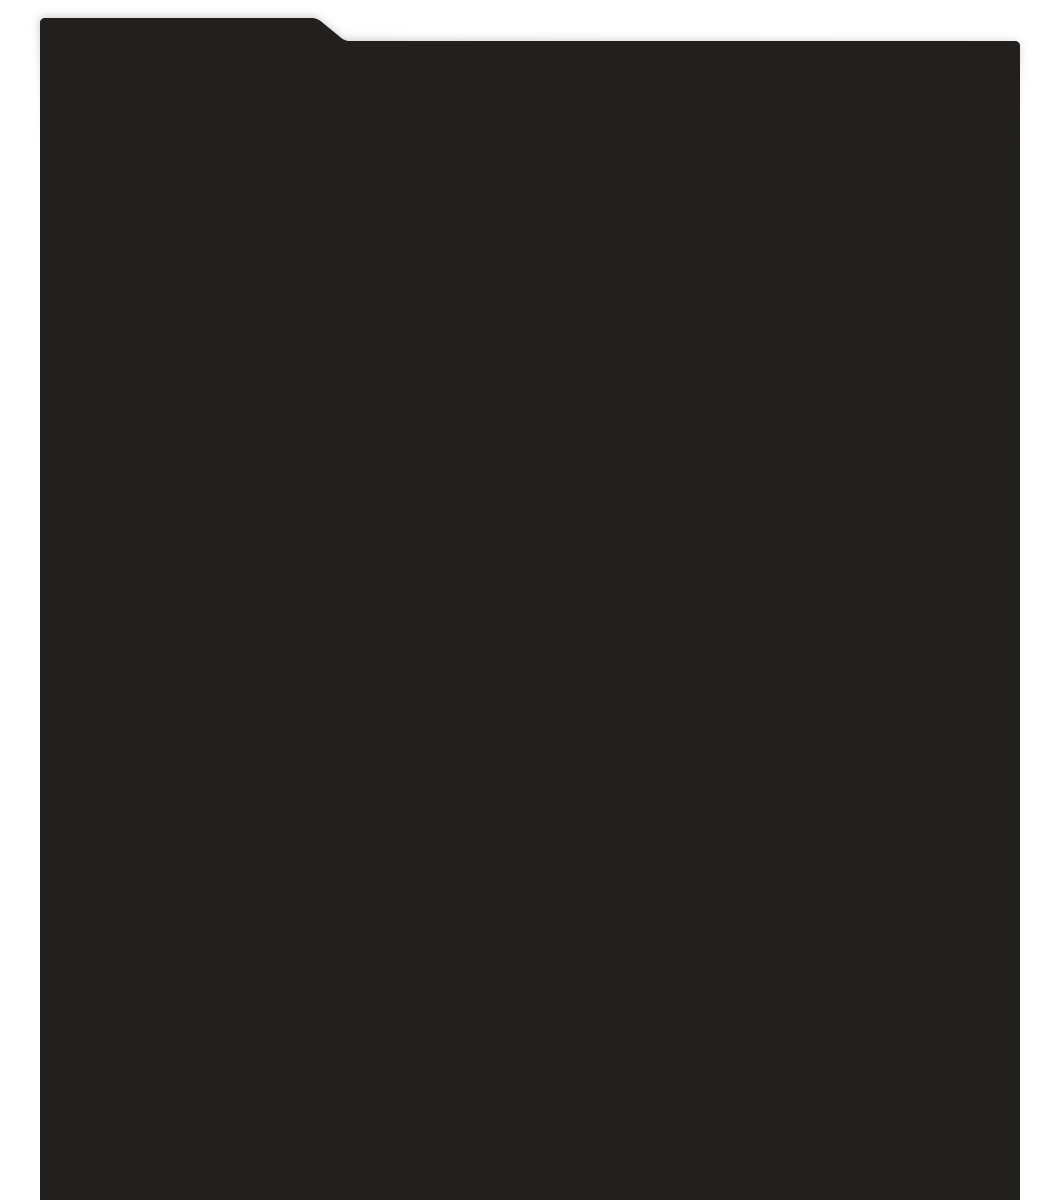
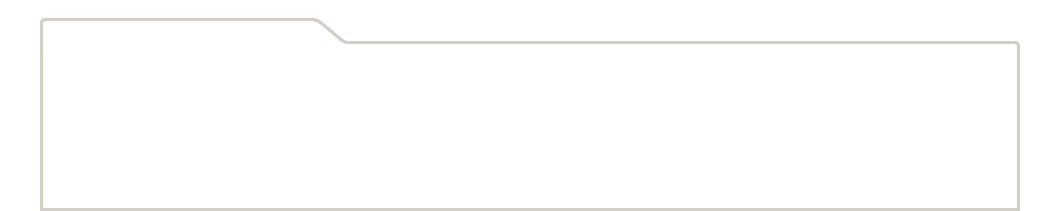
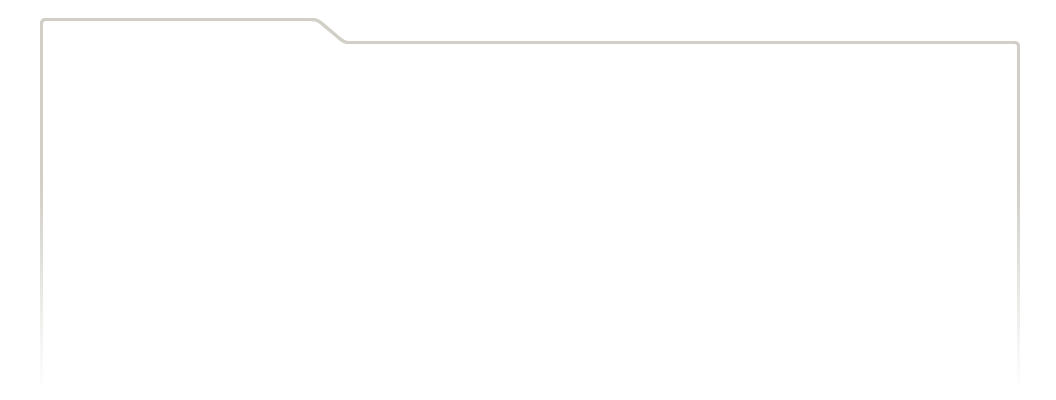
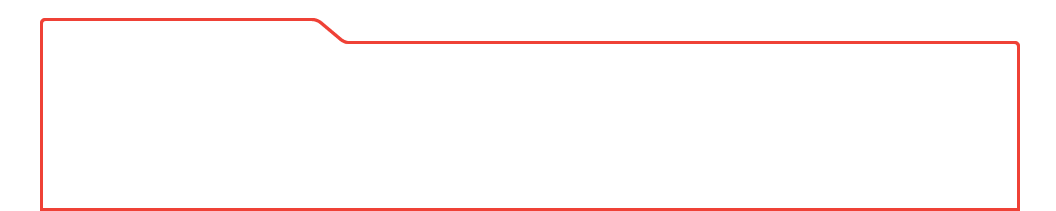
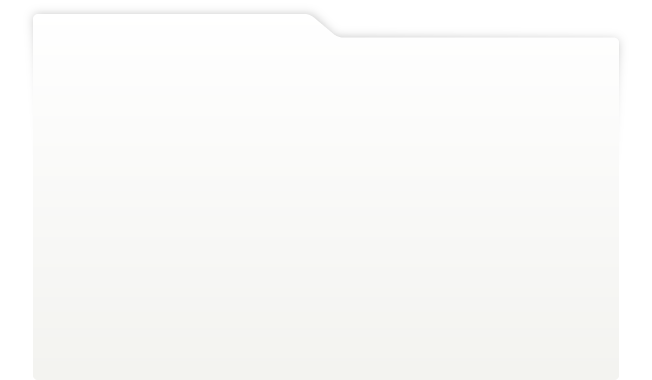
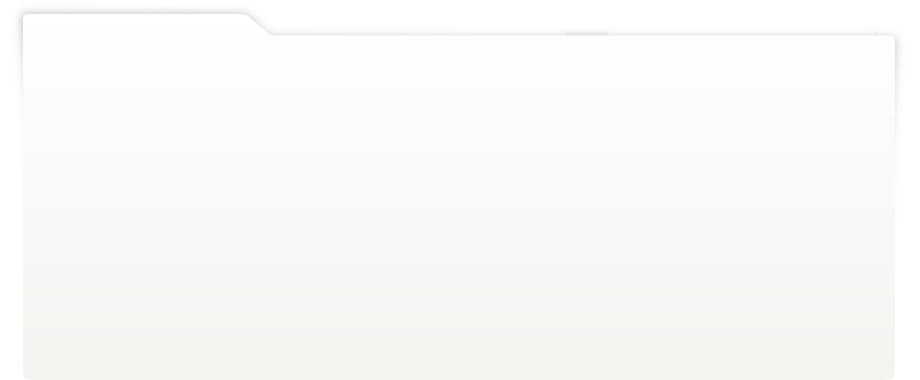
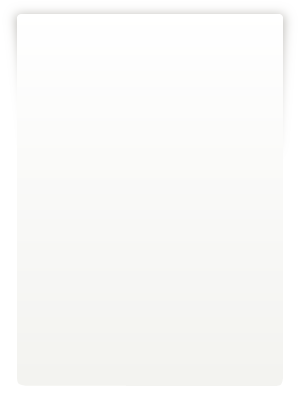
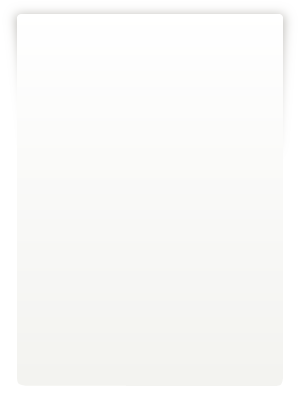
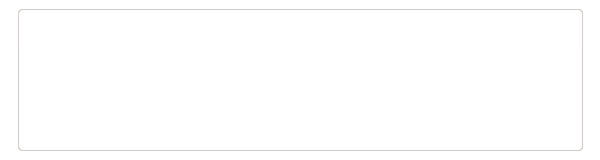
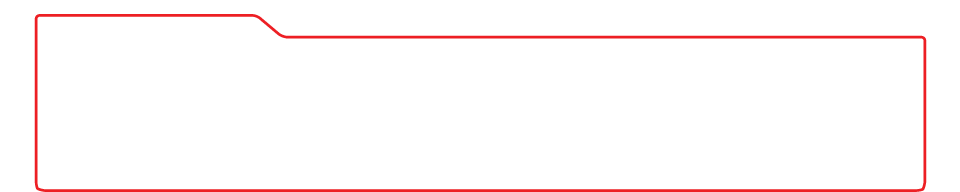
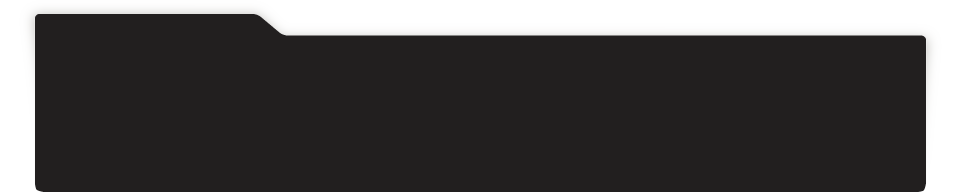
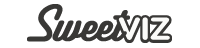
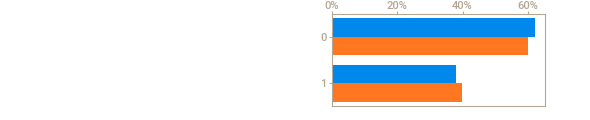
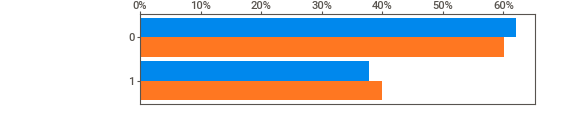
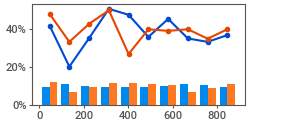
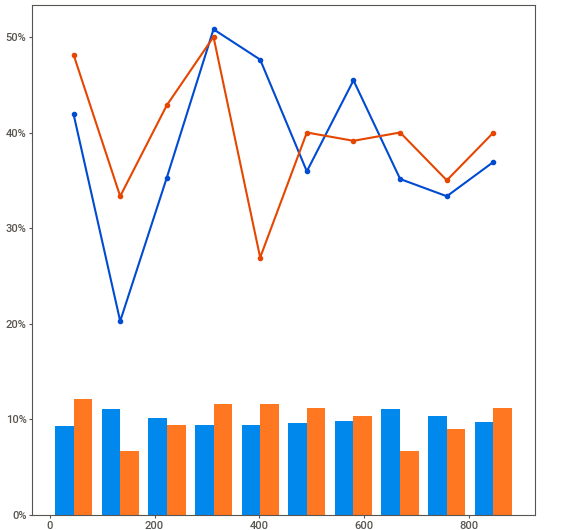
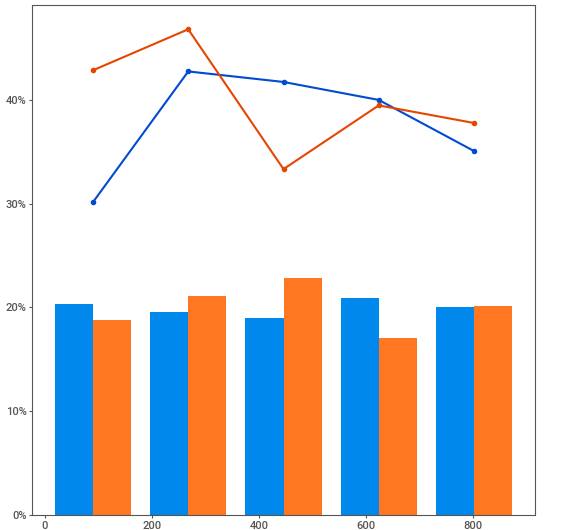
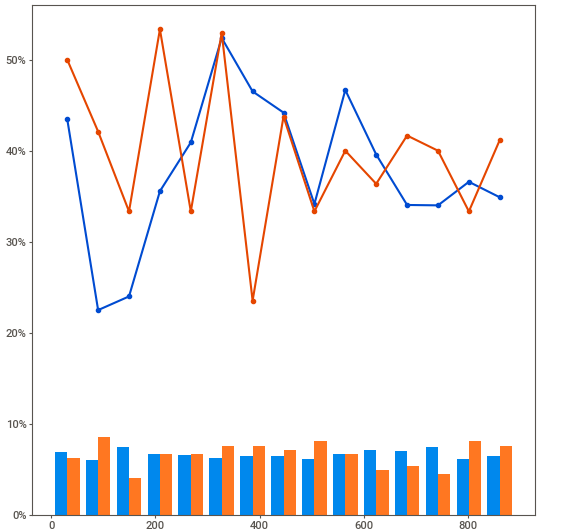
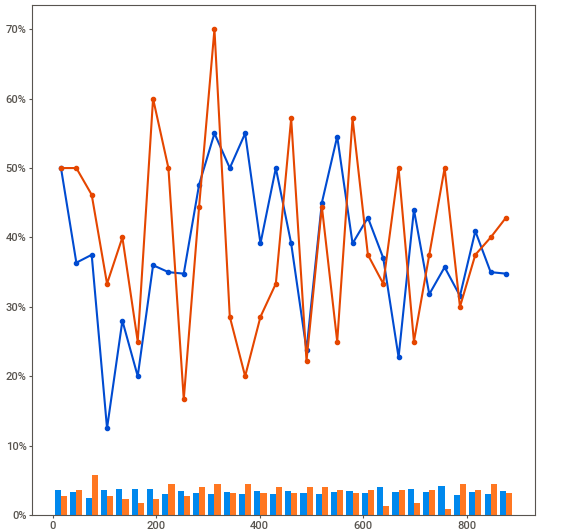
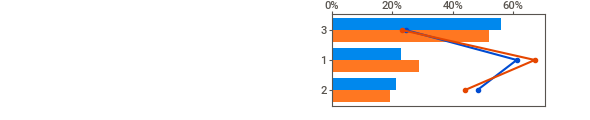
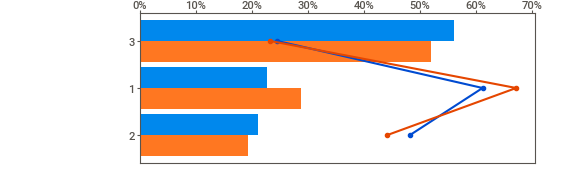
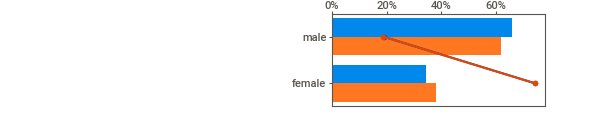
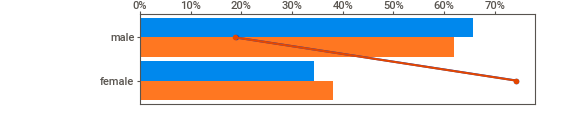
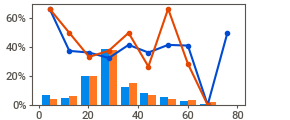
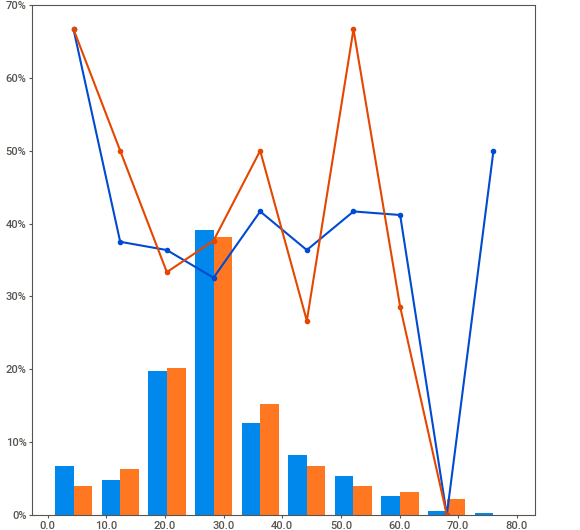
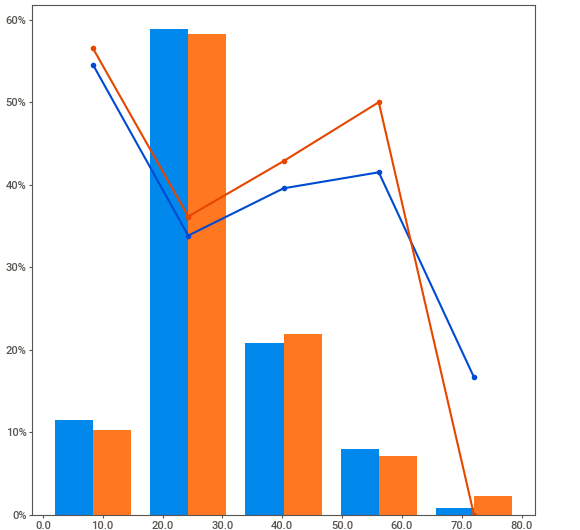
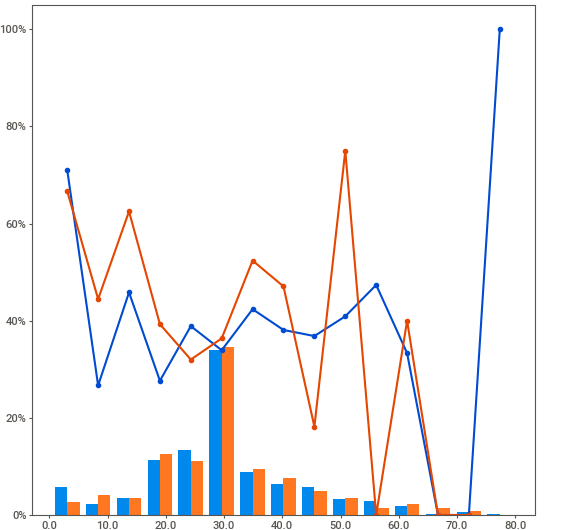
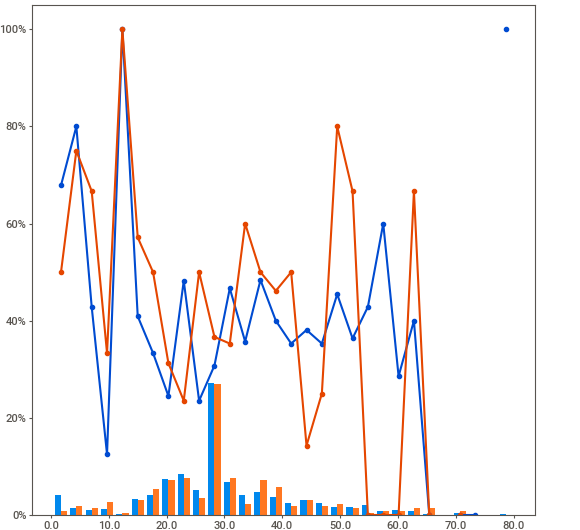
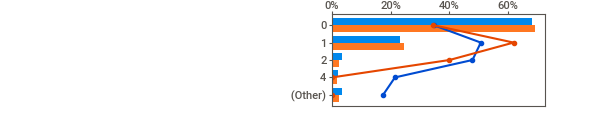
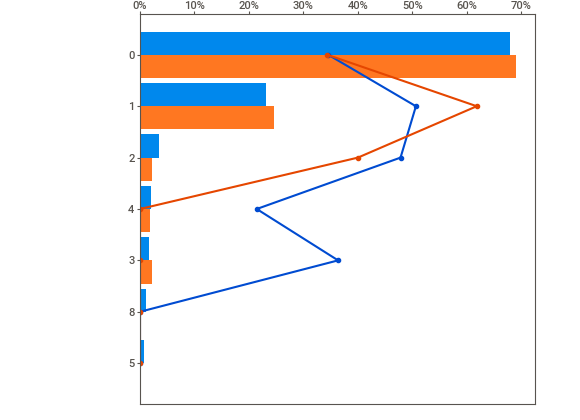
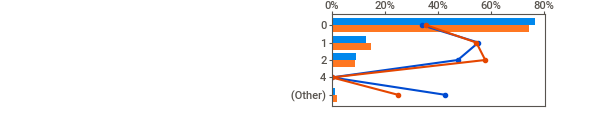
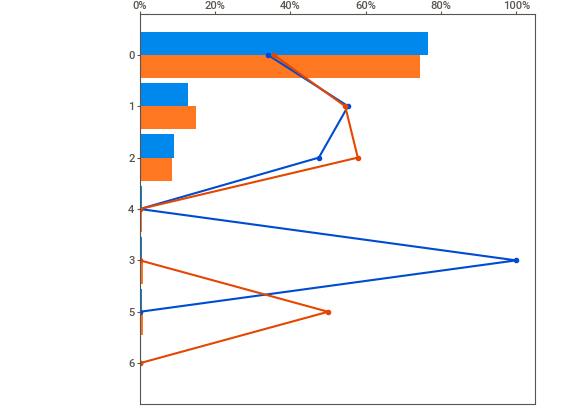
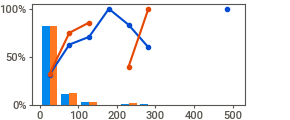
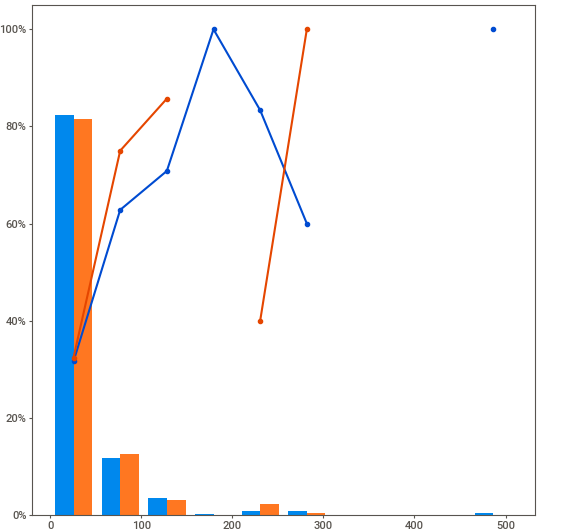
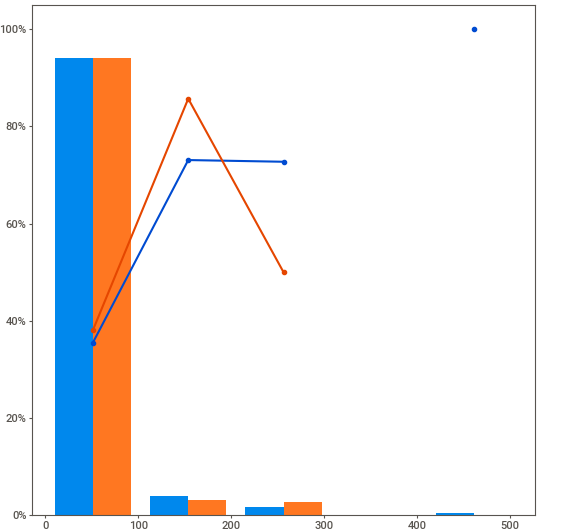
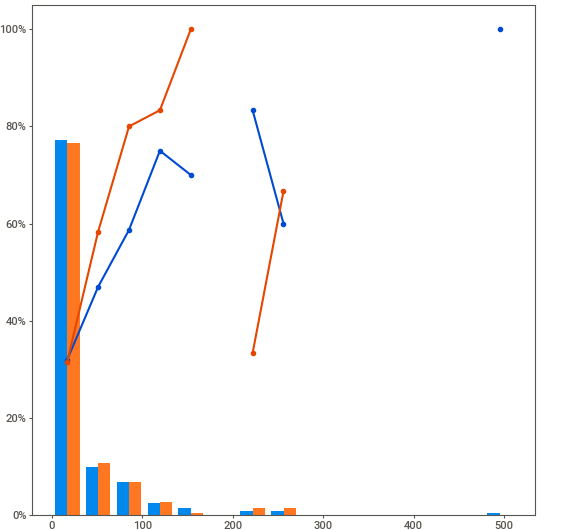
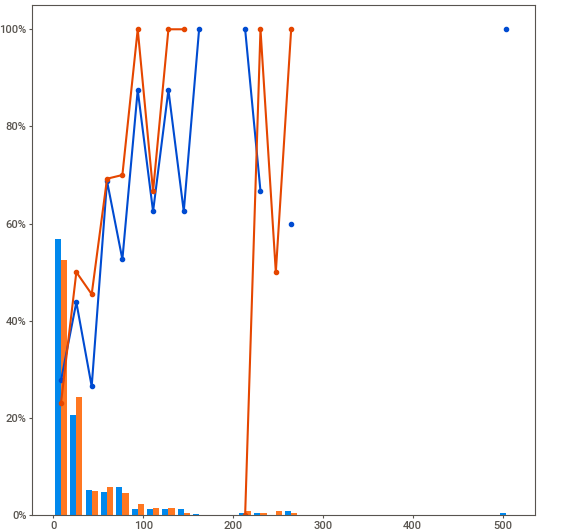
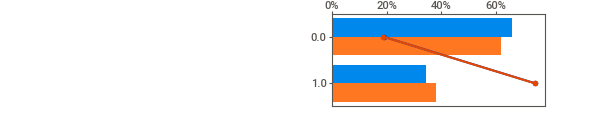
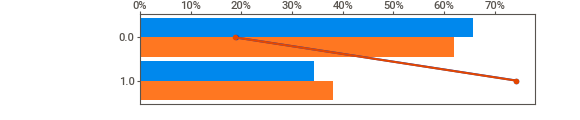
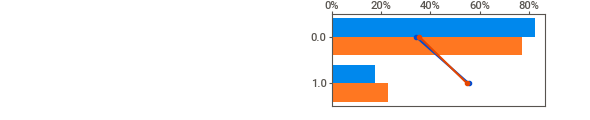
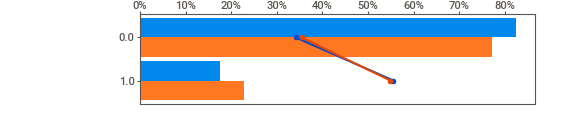
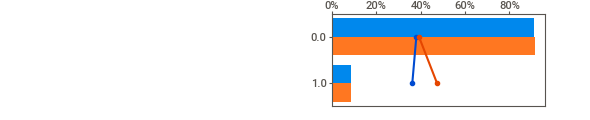
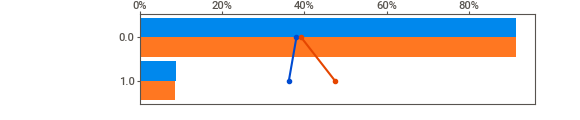
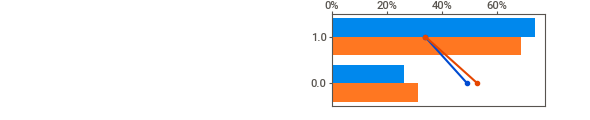
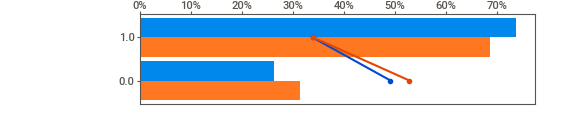
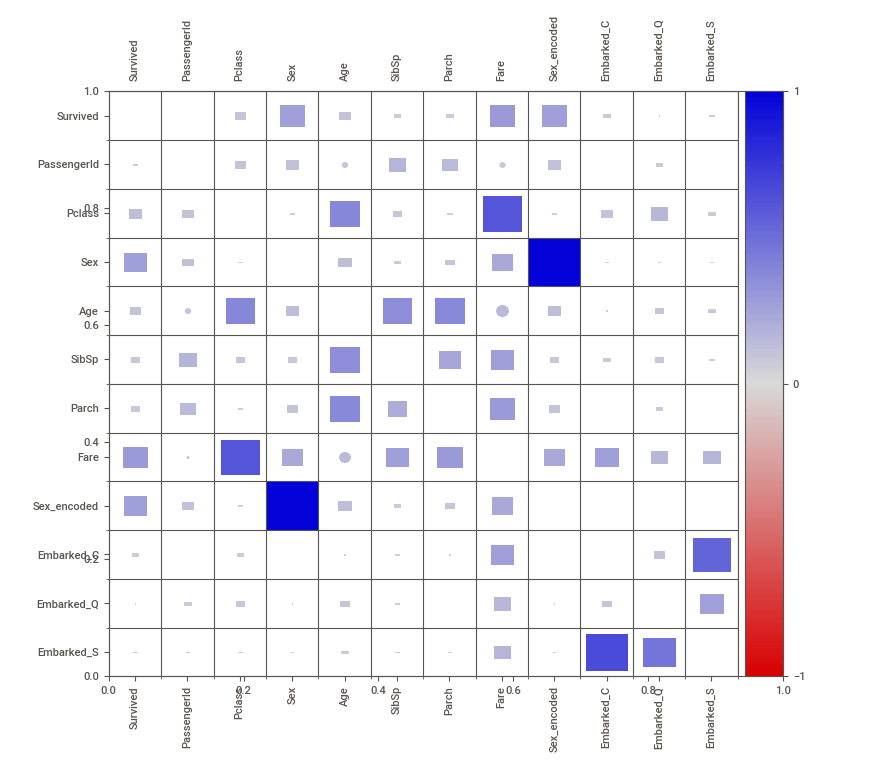
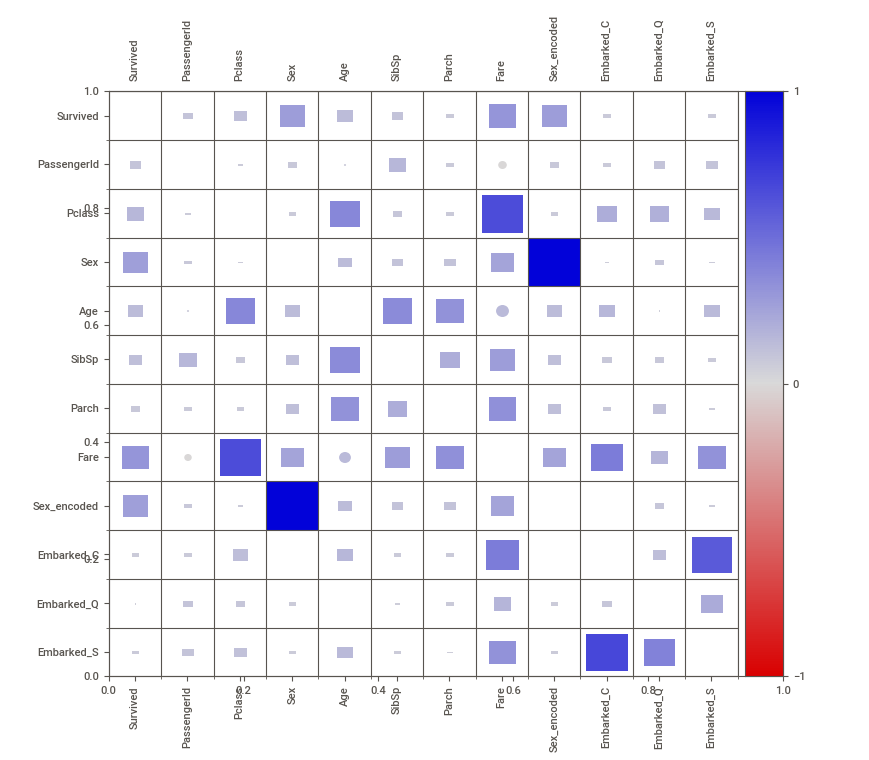

In [ ]:
import sweetviz as sv
comparison_report = sv.compare([pd.concat([X_train, y_train], axis=1), 'Train'],
                                     [pd.concat([X_test, y_test], axis=1), 'Test'],
                                     target_feat='Survived')
comparison_report.show_notebook()

In [ ]:
# decision tree creating
tree = DecisionTreeClassifier(max_depth=6,
                              random_state=42,
                              min_samples_leaf=25,
                              criterion = 'gini')

# data to fit (chosen features)
X = X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
# target variable
y = y_train

# Training / Fitting model to the data
tree.fit(X,y)

# Model validation on test subset
X_val = X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Prediction
predictions_1 = tree.predict(X_val)


In [ ]:
# confusion matrix
cm_data = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_1 }, index= y_test.index)
pd.crosstab(cm_data['Actual'], cm_data['Predicted'])

Predicted,0,1
Actual,,
0,122,12
1,33,56


In [ ]:
print(classification_report(y_test, predictions_1))
measure_values_1 = quality_measurement(cm_data)

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       134
           1       0.82      0.63      0.71        89

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223

Accuracy: 0.80
Precision: 0.82
Recall: 0.63
F1-score: 0.71


In [ ]:
# implementing random forest
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, min_samples_leaf=25, random_state=42)

# data to fit (chosen features)
X = X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
# target variable
y = y_train

# Training / Fitting model to the data
random_forest.fit(X, y)

# Model validation on test subset
X_val = X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Prediction
predictions_2 = random_forest.predict(X_val)

In [ ]:
# confusion matrix
cm_data_2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_2}, index= y_test.index)
pd.crosstab(cm_data_2['Actual'], cm_data_2['Predicted'])

Predicted,0,1
Actual,,
0,116,18
1,28,61


In [ ]:
print(classification_report(y_test, predictions_2))
measure_values_2 = quality_measurement(cm_data_2)

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       134
           1       0.77      0.69      0.73        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

Accuracy: 0.79
Precision: 0.77
Recall: 0.69
F1-score: 0.73


### Cross-Validation #2

Second check for verify models accuracy, precision, recall and f1-score.

In [ ]:
# Second cross-validation

models = [tree, random_forest]

for j in ['accuracy', 'precision', 'recall', 'f1']:
    print(f"{j}:")
    for i, model in enumerate(models):
        X = X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
        y = y_test

        scores = cross_val_score(model, X, y, cv=5, scoring=j)
        print(f"{i+1}. {j} mean = {scores.mean():.2f}, standard deviation = {scores.std():.2f}")

accuracy:
1. accuracy mean = 0.78, standard deviation = 0.04
2. accuracy mean = 0.72, standard deviation = 0.06
precision:
1. precision mean = 0.76, standard deviation = 0.06
2. precision mean = 0.71, standard deviation = 0.07
recall:
1. recall mean = 0.65, standard deviation = 0.17
2. recall mean = 0.53, standard deviation = 0.20
f1:
1. f1 mean = 0.69, standard deviation = 0.10
2. f1 mean = 0.58, standard deviation = 0.13


## Results for Kaggle competition

In [ ]:
# pulling and preparing data for prediction

comp_dataset = pd.read_csv('https://drive.google.com/uc?id=17M0GMVJzry3zlx74s_9I-Ky7Tl3cOU7I')


# creating a copy of DataFrame
df_comp = comp_dataset.copy()

# missing data treatment
df_comp = df_comp.drop(columns = ['Name', 'Ticket', 'Cabin'])
df_comp['Age'] = df_comp['Age'].fillna(df_comp['Age'].median())
df_comp['Embarked'] = df_comp['Embarked'].fillna('S')

# encoding features
encoder = OneHotEncoder(sparse_output=False)
encoded_data1 = encoder.fit_transform(df_comp.loc[:,['Sex']])
encoded_sex = pd.DataFrame(encoded_data1, columns=encoder.get_feature_names_out())

# Sex: 0 for male 1 for female
df_comp['Sex_encoded'] = encoded_sex['Sex_female']

# Embarkation port encoding
# There will be 3 new columns with value: 1 if person embarked in appropriate city
encoded_data2 = encoder.fit_transform(df_comp.loc[:,['Embarked']],)
encoded_embarkation = pd.DataFrame(encoded_data2, columns = encoder.get_feature_names_out())

df_comp = pd.merge(df_comp, encoded_embarkation, how='left', left_index=True, right_index=True )

# unnecessary column drop
df_comp = df_comp.drop('Embarked', axis=1)


In [ ]:
# decision tree results
X = df_comp[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
pred = tree.predict(X)

In [ ]:
results_tree = pd.DataFrame({'PassengerID': df_comp['PassengerId'],'Survived': pred})
results_tree.to_csv('/content/drive/My Drive/UMBD/2_ćwiczenia/c1/Titanic_competition/1_tree_results.csv', index = False)
results_tree

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# random forest results
X = df_comp[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
pred = random_forest.predict(X)

In [ ]:
results_forest = pd.DataFrame({'PassengerID': df_comp['PassengerId'],'Survived': pred})
results_forest.to_csv('/content/drive/My Drive/UMBD/2_ćwiczenia/c1/Titanic_competition/2_forest_results.csv', index = False)
results_forest

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
